## 02 - Identificando os grupos etários com K-means: Kaggle Titanic

## Preparando o ambiente

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [3]:
mpl.rcParams['figure.figsize'] = (12, 7)
sns.set(style='darkgrid')

## Carregando os dados

In [4]:
titanic = pd.read_csv('https://raw.githubusercontent.com/SalatielBairros/kaggle-titanic/main/data/processed/train_processed.csv')
del titanic['Unnamed: 0']
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Floor,Embarked,Relateds
0,0,3,male,22,1,0,SC,S,1
1,1,1,female,38,1,0,C,C,1
2,1,3,female,26,0,0,SC,S,0
3,1,1,female,35,1,0,C,S,1
4,0,3,male,35,0,0,SC,S,0


In [5]:
idades, frequencia = np.unique(titanic.Age.values, return_counts=True)

## Visualizando as idades e frequencias

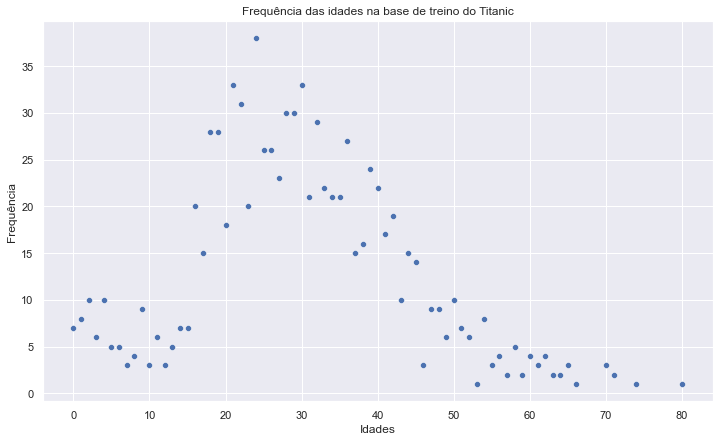

In [6]:
sns.scatterplot(x=idades, y=frequencia)
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.title('Frequência das idades na base de treino do Titanic')
plt.show();

## Criando os grupos

In [7]:
X = pd.DataFrame()
X['Idade'] = idades
X['Frequencia'] = frequencia
X

,Idade,Frequencia
0,0,7
1,1,8
2,2,10
3,3,6
4,4,10
...,...,...
66,66,1
67,70,3
68,71,2
69,74,1


In [8]:
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
n_init = [10, 15, 20]
max_iter = [300, 500]
resultados = []


for n in n_clusters:
    for i in n_init:
        for m in max_iter:
            agrupador = KMeans(n_clusters=n, n_init=i, max_iter=m)
            labels = agrupador.fit_predict(X)
            ss = silhouette_score(X, labels)
            ch = calinski_harabasz_score(X, labels)
            db = davies_bouldin_score(X, labels)
            values, counts = np.unique(labels, return_counts=True)
            r = {
                  'n_clusters': n,
                  'n_init': i,
                  'max_iter': m,
                  'Silhouette': ss,
                  'Calinski': ch,
                  'Bouldin':  db,
                  'counts': counts
            }
            resultados.append(r)

grupos = pd.DataFrame(data=resultados)

## Avaliando os modelos gerados

In [9]:
grupos.sort_values(by='Silhouette', ascending=False).head(5)

,n_clusters,n_init,max_iter,Silhouette,Calinski,Bouldin,counts
6,3,10,300,0.599961,192.003983,0.510518,"[26, 28, 17]"
7,3,10,500,0.599961,192.003983,0.510518,"[17, 28, 26]"
8,3,15,300,0.599961,192.003983,0.510518,"[26, 28, 17]"
9,3,15,500,0.599961,192.003983,0.510518,"[28, 17, 26]"
10,3,20,300,0.599961,192.003983,0.510518,"[26, 28, 17]"


O coeficiente de silhueta é bom para dados com curvas no espaço.

In [10]:
grupos.sort_values(by='Calinski', ascending=False).head(5)

,n_clusters,n_init,max_iter,Silhouette,Calinski,Bouldin,counts
44,9,15,300,0.436438,258.826295,0.673650,"[12, 4, 8, 10, 9, 9, 4, 8, 7]"
43,9,10,500,0.436305,258.683134,0.667163,"[11, 4, 8, 9, 10, 11, 7, 7, 4]"
47,9,20,500,0.442329,258.175124,0.660839,"[12, 12, 9, 7, 9, 4, 7, 4, 7]"
46,9,20,300,0.429054,254.940511,0.679729,"[7, 9, 4, 5, 8, 9, 12, 10, 7]"
45,9,15,500,0.429054,254.940511,0.679729,"[7, 4, 5, 7, 9, 9, 10, 8, 12]"


O Calinski não performa tão bem para dados com curva no espaço e com baixa densidade. Portanto não é a melhor métrica a ser usada para este dataset.

In [11]:
grupos.sort_values(by='Bouldin', ascending=True).head(5)

,n_clusters,n_init,max_iter,Silhouette,Calinski,Bouldin,counts
11,3,20,500,0.599961,192.003983,0.510518,"[28, 26, 17]"
6,3,10,300,0.599961,192.003983,0.510518,"[26, 28, 17]"
7,3,10,500,0.599961,192.003983,0.510518,"[17, 28, 26]"
8,3,15,300,0.599961,192.003983,0.510518,"[26, 28, 17]"
9,3,15,500,0.599961,192.003983,0.510518,"[28, 17, 26]"


O Bouldin é baseado na semelhança dos elementos dentro do cluster e diferença entre os clusters, sendo melhor mas semelhante ao coeficiente de silhueta.

In [12]:
grupos.sort_values(by=['Silhouette', 'Bouldin', 'Calinski', 'n_init', 'max_iter'], ascending=[False, True, True, True, True]).head(1)

,n_clusters,n_init,max_iter,Silhouette,Calinski,Bouldin,counts
7,3,10,500,0.599961,192.003983,0.510518,"[17, 28, 26]"


## Executando o modelo selecionado

O melhor modelo agrupou as idades em 3 pela frequência, permitindo, a princípio, uma categorização mais justa com relação à distribuição dos dados.

In [13]:
agrupador = KMeans(n_clusters=3, n_init=10, max_iter=300)
labels = agrupador.fit_predict(X)
X['cod_faixa_etaria'] = labels
X.sample(10)

,Idade,Frequencia,cod_faixa_etaria
48,48,9,0
34,34,21,2
26,26,26,2
64,64,2,0
16,16,20,2
53,53,1,0
35,35,21,2
27,27,23,2
49,49,6,0
51,51,7,0


In [14]:
X.groupby('cod_faixa_etaria').Idade.describe()

,count,mean,std,min,25%,50%,75%,max
cod_faixa_etaria,,,,,,,,
0,28.0,57.250000,9.586352,43.0,49.75,56.5,63.25,80.0
1,17.0,8.058824,5.153525,0.0,4.00,8.0,12.00,17.0
2,26.0,29.461538,7.716117,16.0,23.25,29.5,35.75,42.0


**Faixas de idade identificadas:**

* _Criança/Adolescente_: 0 - 15
* _Jovem/Adulto_: 16 - 41
* _Adulto/Idoso_: 42 - 80

In [15]:
X.loc[(X['Idade'] == 16) | (X['Idade'] == 17), 'cod_faixa_etaria'] = 2
X.loc[(X['Idade'] == 16) | (X['Idade'] == 17)]

,Idade,Frequencia,cod_faixa_etaria
16,16,20,2
17,17,15,2


In [16]:
X.loc[(X['Idade'] == 42) | (X['Idade'] == 43), 'cod_faixa_etaria'] = 0
X.loc[(X['Idade'] == 42) | (X['Idade'] == 43)]

,Idade,Frequencia,cod_faixa_etaria
42,42,19,0
43,43,10,0


In [17]:
X.groupby('cod_faixa_etaria').Idade.describe()

,count,mean,std,min,25%,50%,75%,max
cod_faixa_etaria,,,,,,,,
0,29.0,56.724138,9.830334,42.0,49.00,56.0,63.00,80.0
1,16.0,7.500000,4.760952,0.0,3.75,7.5,11.25,15.0
2,26.0,28.500000,7.648529,16.0,22.25,28.5,34.75,41.0


In [19]:
map_idade = {
    0: 'adulto_idoso',
    1: 'crianca_adolescente',
    2: 'jovem_adulto'
}
titanic = (titanic.merge(X, left_on='Age', right_on='Idade')).drop(columns=['Idade', 'Frequencia'])
titanic['faixa_etaria'] = titanic.cod_faixa_etaria.map(map_idade)
titanic.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Floor,Embarked,Relateds,cod_faixa_etaria,faixa_etaria
290,1,1,female,43,0,1,B,S,1,0,adulto_idoso
544,0,3,male,44,1,0,SC,Q,1,0,adulto_idoso
563,1,3,female,16,0,0,SC,Q,0,2,jovem_adulto
82,1,3,female,35,0,0,SC,C,0,2,jovem_adulto
470,0,3,male,21,0,0,SC,S,0,2,jovem_adulto
157,1,2,female,14,1,0,SC,C,1,1,crianca_adolescente
505,1,3,female,18,0,0,SC,S,0,2,jovem_adulto
245,1,3,female,24,0,2,G,S,2,2,jovem_adulto
320,1,3,female,15,0,0,SC,C,0,1,crianca_adolescente
571,1,1,female,16,0,0,B,S,0,2,jovem_adulto


## Visualizando os agrupamentos

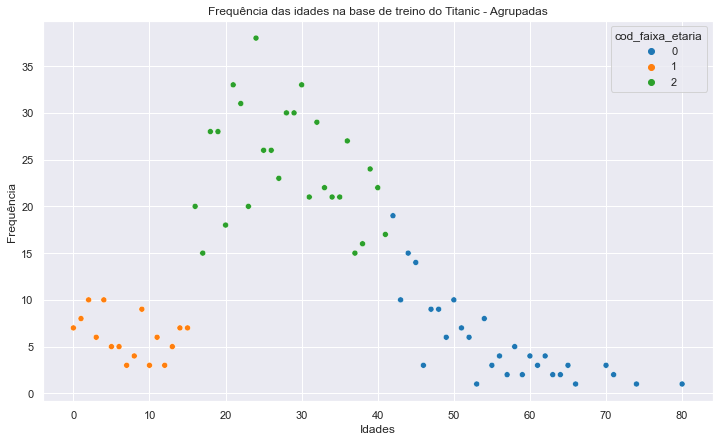

In [20]:
sns.scatterplot(x='Idade', y='Frequencia', data=X, hue='cod_faixa_etaria', palette="tab10")
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.title('Frequência das idades na base de treino do Titanic - Agrupadas')
plt.show();

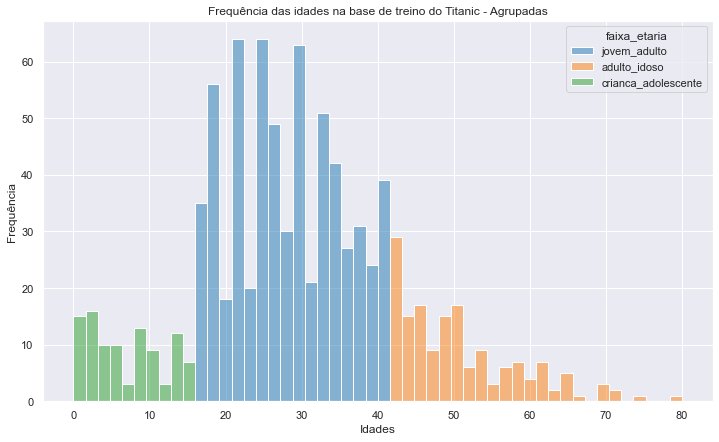

In [21]:
sns.histplot(x='Age', data=titanic, hue='faixa_etaria', palette="tab10", bins=50)
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.title('Frequência das idades na base de treino do Titanic - Agrupadas')
plt.show();

In [22]:
del titanic['cod_faixa_etaria']

In [23]:
titanic.to_csv('../../data/processed/train_processed_byage.csv')